데이터 개수 확인

In [20]:
import os

def count_files_in_directory(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

directory_path = "/home/addinedu/dev_ws/data/miggyo/processed_O"
total_files = count_files_in_directory(directory_path)
print("폴더 내 데이터 개수:", total_files)


폴더 내 데이터 개수: 288


In [2]:
import os

def count_files_in_directory(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

directory_path = "/home/addinedu/dev_ws/data/miggyo/x_data"
total_files = count_files_in_directory(directory_path)
print("폴더 내 데이터 개수:", total_files)


폴더 내 데이터 개수: 300


데이터 리사이즈

In [3]:
import os
import cv2

# 원본 이미지가 있는 폴더 경로
source_folder = "/home/addinedu/dev_ws/data/miggyo/O"

# 새로운 폴더 경로
destination_folder = "/home/addinedu/dev_ws/data/miggyo/resized_O"

# 새로운 폴더가 없다면 생성
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# 폴더 내의 모든 파일 목록 가져오기
file_list = os.listdir(source_folder)

# 모든 파일에 대해 작업 수행
for file_name in file_list:
    # 파일의 전체 경로 구성
    source_file_path = os.path.join(source_folder, file_name)
    
    # 이미지 로드
    image = cv2.imread(source_file_path)
    
    # 이미지가 None이 아니라면 (올바르게 로드되었다면)
    if image is not None:
        # 이미지를 32x32 픽셀로 리사이즈
        resized_image = cv2.resize(image, (128, 128))
        
        # 새로운 파일 경로 구성
        destination_file_path = os.path.join(destination_folder, file_name)
        
        # 리사이즈된 이미지를 새로운 폴더에 저장
        cv2.imwrite(destination_file_path, resized_image)


In [6]:
import os
import cv2

# 원본 이미지가 있는 폴더 경로
source_folder = "/home/addinedu/dev_ws/data/miggyo/x_data"

# 새로운 폴더 경로
destination_folder = "/home/addinedu/dev_ws/data/miggyo/resized_x"

# 새로운 폴더가 없다면 생성
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# 폴더 내의 모든 파일 목록 가져오기
file_list = os.listdir(source_folder)

# 모든 파일에 대해 작업 수행
for file_name in file_list:
    # 파일의 전체 경로 구성
    source_file_path = os.path.join(source_folder, file_name)
    
    # 이미지 로드
    image = cv2.imread(source_file_path)
    
    # 이미지가 None이 아니라면 (올바르게 로드되었다면)
    if image is not None:
        # 이미지를 32x32 픽셀로 리사이즈
        resized_image = cv2.resize(image, (128, 128))
        
        # 새로운 파일 경로 구성
        destination_file_path = os.path.join(destination_folder, file_name)
        
        # 리사이즈된 이미지를 새로운 폴더에 저장
        cv2.imwrite(destination_file_path, resized_image)


리사이즈 된 이미지 확인

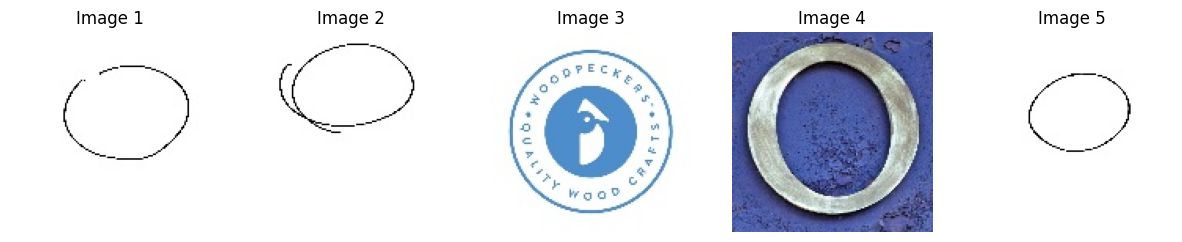

In [1]:
import os
import cv2
import random
import matplotlib.pyplot as plt

resized_folder = "/home/addinedu/dev_ws/data/miggyo/resized_O"

# 폴더 내의 모든 파일 목록 가져오기
file_list = os.listdir(resized_folder)

# 랜덤하게 5장의 이미지 선택
random_images = random.sample(file_list, 5)

# 이미지를 subplot에 표시
plt.figure(figsize=(15, 5))
for i, image_name in enumerate(random_images, 1):
    image_path = os.path.join(resized_folder, image_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식이므로 RGB로 변환
    plt.subplot(1, 5, i)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Image {i}")

plt.show()

이미지 라벨링

In [22]:
import os
import pandas as pd

# 이미지 폴더 경로
image_folder = "/home/addinedu/dev_ws/data/miggyo/processed_x"
# 라벨
label = "0"

# 이미지 파일 목록
image_files = os.listdir(image_folder)

# 빈 리스트 생성
data = []

# 이미지 파일에 대해 반복하면서 라벨링
for image_file in image_files:
    # 이미지 파일 경로
    image_path = os.path.join(image_folder, image_file)
    # 이미지 파일 경로와 라벨을 튜플로 묶어 리스트에 추가
    data.append((image_path, label))

# 리스트를 데이터프레임으로 변환
df = pd.DataFrame(data, columns=["Image_Path", "Label"])

# 라벨링된 데이터를 CSV 파일로 저장
output_csv_path = "/home/addinedu/dev_ws/data/miggyo/x2_labels.csv"
df.to_csv(output_csv_path, index=False)

print("라벨링이 완료되었습니다. 라벨링된 데이터는", output_csv_path, "에 저장되었습니다.")


라벨링이 완료되었습니다. 라벨링된 데이터는 /home/addinedu/dev_ws/data/miggyo/x2_labels.csv 에 저장되었습니다.


이미지 라벨링 잘 되었는지 확인

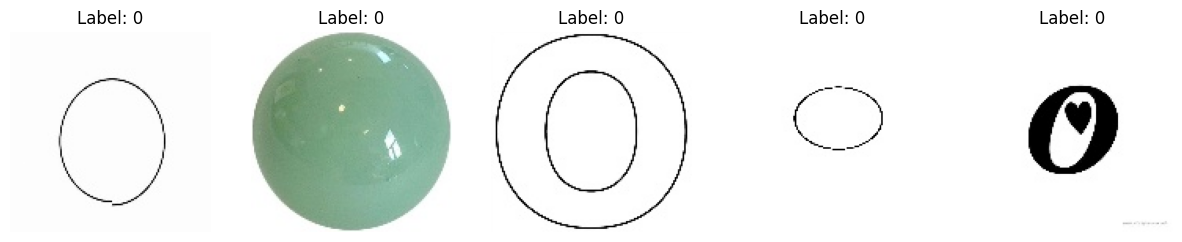

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# CSV 파일 경로
csv_file = "/home/addinedu/dev_ws/data/miggyo/O_labels.csv"

# CSV 파일 읽기
df = pd.read_csv(csv_file)

# 랜덤하게 5개의 이미지 선택
random_indices = random.sample(range(len(df)), 5)

# 이미지와 라벨 표시
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices, 1):
    image_path = df.loc[idx, 'Image_Path']
    label = df.loc[idx, 'Label']
    
    # 이미지 표시
    plt.subplot(1, 5, i)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Label: {label}")

plt.show()


이미지 전처리 (그레이스케일 + threshold)

In [16]:
import os
import cv2

# 이미지가 있는 폴더 경로
resized_O_folder = "/home/addinedu/dev_ws/data/miggyo/resized_O"
resized_X_folder = "/home/addinedu/dev_ws/data/miggyo/resized_x"

# 전처리된 이미지를 저장할 폴더 경로
processed_O_folder = "/home/addinedu/dev_ws/data/miggyo/processed_O"
processed_X_folder = "/home/addinedu/dev_ws/data/miggyo/processed_x"

# 폴더가 없다면 생성
if not os.path.exists(processed_O_folder):
    os.makedirs(processed_O_folder)
if not os.path.exists(processed_X_folder):
    os.makedirs(processed_X_folder)

def preprocess_image(image_folder, processed_folder):
    # 이미지 파일 목록
    image_files = os.listdir(image_folder)
    
    # 이미지 전처리
    for image_file in image_files:
        # 이미지 파일 경로
        image_path = os.path.join(image_folder, image_file)
        
        # 이미지 로드
        image = cv2.imread(image_path)
        
        # 그레이 스케일 변환
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Threshold 적용
        _, thresholded_image = cv2.threshold(gray_image, 180, 255, cv2.THRESH_BINARY)
        
        # 전처리된 이미지 저장
        processed_image_path = os.path.join(processed_folder, image_file)
        cv2.imwrite(processed_image_path, thresholded_image)

# 이미지 폴더마다 전처리 적용
preprocess_image(resized_O_folder, processed_O_folder)
preprocess_image(resized_X_folder, processed_X_folder)

print("이미지 전처리가 완료되었습니다.")


이미지 전처리가 완료되었습니다.


라벨링 데이터 프레임 컬럼 확인

In [24]:
import pandas as pd

# 라벨링된 CSV 파일 경로
csv_file_path = "/home/addinedu/dev_ws/data/miggyo/O2_labels.csv"

# CSV 파일 로드
df = pd.read_csv(csv_file_path)

# 데이터프레임 출력
print(df.head())


                                          Image_Path  Label
0  /home/addinedu/dev_ws/data/miggyo/processed_O/...      0
1  /home/addinedu/dev_ws/data/miggyo/processed_O/...      0
2  /home/addinedu/dev_ws/data/miggyo/processed_O/...      0
3  /home/addinedu/dev_ws/data/miggyo/processed_O/...      0
4  /home/addinedu/dev_ws/data/miggyo/processed_O/...      0


LeNet-5 모델 사용하여 학습 진행

In [1]:
import os
import numpy as np
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf

# 이미지가 있는 폴더 경로
processed_O_folder = "/home/addinedu/dev_ws/data/miggyo/processed_O"
processed_X_folder = "/home/addinedu/dev_ws/data/miggyo/processed_x"

# 라벨링이 있는 csv 파일 경로
O_label_file = "/home/addinedu/dev_ws/data/miggyo/O2_labels.csv"
X_label_file = "/home/addinedu/dev_ws/data/miggyo/x2_labels.csv"

# CSV 파일 로드
O_labels_df = pd.read_csv(O_label_file)
X_labels_df = pd.read_csv(X_label_file)

# 이미지 파일 목록 및 라벨링
X = []
y = []

# Processed X 이미지와 라벨링
for index, row in X_labels_df.iterrows():
    image_path = os.path.join(processed_X_folder, row['Image_Path'])
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_resized = cv2.resize(image, (128, 128))  # 이미지 크기 조정
    X.append(image_resized)
    y.append('X')

# Processed O 이미지와 라벨링
for index, row in O_labels_df.iterrows():
    image_path = os.path.join(processed_O_folder, row['Image_Path'])
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_resized = cv2.resize(image, (128, 128))  # 이미지 크기 조정
    X.append(image_resized)
    y.append('O')

X = np.array(X)
y = np.array(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 전처리: 이미지 크기 조정 및 정규화
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1).astype('float32') / 255

# 라벨 인코딩
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)


# LeNet-5 모델 생성
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(num_classes, activation='softmax')  # 클래스 수에 따라 출력 설정
])

# 모델 컴파일
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


2024-05-14 14:11:30.346255: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 14:11:31.200843: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/addinedu/venv/opencv2_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-14 14:11:32.011195: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA nod

Epoch 1/10


2024-05-14 14:11:32.048071: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-14 14:11:32.048339: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-14 14:11:32.126822: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 2)

In [27]:
# 다른 디렉토리에 훈련된 모델 저장
model.save("/home/addinedu/dev_ws/DL/miggyo_/Lenet5_model.h5")

실시간 웹캠을 사용해서 테스트 해봅시다. (주의 radius 변수를 적절히 지정!! >> 범위를 벗어난 roi는 검출하지 않음)

In [28]:
import cv2
import numpy as np
import tensorflow as tf
model = tf.keras.models.load_model('/home/addinedu/dev_ws/DL/miggyo_/Lenet5_model.h5')  # 모델 파일 경로 지정


cap = cv2.VideoCapture(2)


def preprocess_image(img):
    img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)
    img = img.astype("float32") / 255.0
    return img



if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            
            g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            thr, bin_img = cv2.threshold(g_img, 110, 255, cv2.THRESH_BINARY_INV)
            
            contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            digits = []
            try:
                for contour in contours:
                    (x, y), radius = cv2.minEnclosingCircle(contour)
                    if 130 < radius < 150:
                        xs, xe = int(x-radius), int(x+radius)
                        ys, ye = int(y-radius), int(y+radius)
                        cv2.rectangle(bin_img, (xs, ys), (xe, ye), (200, 0, 0), 1)
                        roi = bin_img[ys:ye, xs:xe]
                        
                        roi = cv2.resize(roi, (128, 128), interpolation=cv2.INTER_AREA)
                        roi = roi.astype("float32") / 255.0
                        roi = np.expand_dims(roi, axis=0)
                        
                        # 모델을 사용하여 예측 진행
                        prediction = model.predict(roi)
                        num = np.argmax(prediction)
                        if num == 1:
                            num = 'x'
                        if num == 0:
                            num = 'O'
                        
                        cv2.putText(bin_img, str(num), (xs, ys+20), cv2.FONT_HERSHEY_PLAIN, 3, (200, 0, 0))
            
            except Exception as e:
                pass

            cv2.imshow("Video Capture", bin_img)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            print("No Frame...")
            break
else:
    print("Camera not opened...")
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━

단일 이미지에 대해서 테스트!!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
이미지에 대한 예측된 라벨: X


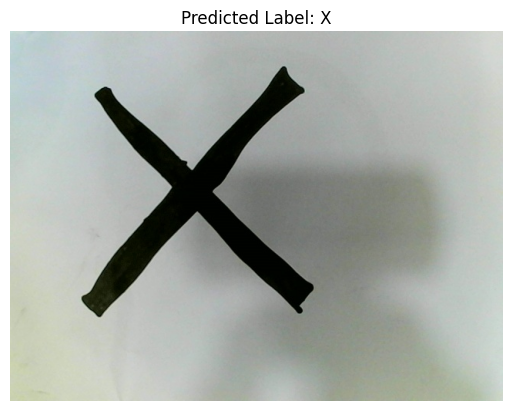

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 단일 이미지 전처리 함수
def preprocess_image(image_path):
    # 이미지 로드
    image = cv2.imread(image_path)
    # 그레이 스케일로 변환
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 이미지 크기 조정
    resized_image = cv2.resize(gray_image, (128, 128))
    # 이미지 정규화
    preprocessed_image = resized_image.astype('float32') / 255.0
    # 모델이 예상하는 입력 형태로 차원 확장
    input_image = np.expand_dims(preprocessed_image, axis=-1)
    return input_image

# 단일 이미지에 대한 라벨 예측 함수
def predict_image(image_path, model):
    preprocessed_image = preprocess_image(image_path)
    # 모델 입력 모양에 맞게 차원 확장
    input_image = np.expand_dims(preprocessed_image, axis=0)
    # 각 클래스에 대한 확률 예측
    predictions = model.predict(input_image)
    # 가장 높은 확률을 가진 인덱스 가져오기
    predicted_class = np.argmax(predictions)
    return predicted_class

# 훈련된 모델 로드
model = tf.keras.models.load_model('/home/addinedu/dev_ws/DL/miggyo_/Lenet5_model.h5')

# 예측에 사용할 이미지 경로
image_path = '/home/addinedu/dev_ws/DL/captured_image1.jpg'

# 이미지 예측
predicted_class = predict_image(image_path, model)

# 클래스 인덱스와 클래스 라벨 간의 매핑 정의
class_mapping = {0: 'O', 1: 'X'}

# 예측된 라벨 가져오기
predicted_label = class_mapping[predicted_class]

print("이미지에 대한 예측된 라벨:", predicted_label)

# 이미지 로드 및 표시
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV에서 matplotlib으로 이미지 표시를 위해 색상 채널 변경

# 이미지와 예측된 라벨을 함께 표시
plt.imshow(image)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')  # 축 제거
plt.show()


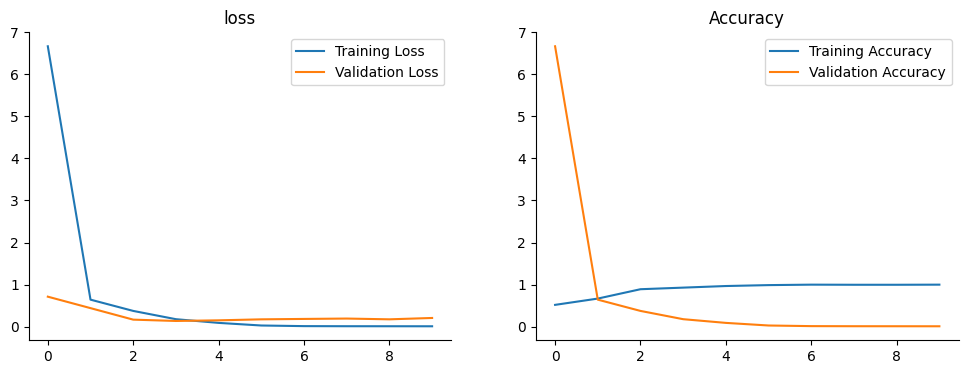

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x = range(len(history.history['loss'])),
             y = history.history['loss'], ax = axes[0],
             label = 'Training Loss')
sns.lineplot(x = range(len(history.history['loss'])),
             y = history.history['val_loss'], ax = axes[0],
             label = 'Validation Loss')

sns.lineplot(x = range(len(history.history['accuracy'])),
             y = history.history['accuracy'], ax = axes[1],
             label = 'Training Accuracy')
sns.lineplot(x = range(len(history.history['accuracy'])),
             y = history.history['loss'], ax = axes[1],
             label = 'Validation Accuracy')
axes[0].set_title('loss'); axes[1].set_title('Accuracy')

sns.despine()
plt.show()

In [52]:
y_test

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.